### Unsupervised Learning Project

### Data Description:
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

### Domain:
Object recognition

### Context:
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

### Attribute Information:
● All the features are geometric features extracted from the silhouette.

● All are numeric in nature.

### Objective:
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

### Import Packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Modelling 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import pandas_profiling 

In [2]:
#Load Data
df=pd.read_csv("vehicle.csv")

In [3]:
#Read first 5 rows
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nUnique values :  \n",df.nunique())
print("\n DataType : \n",df.dtypes)

Rows     :  846
Columns  :  19

Features : 
 ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio', 'class']

Unique values :  
 compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.

In [5]:
## get the generic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
#Checking missing values in dataframe
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
# Observation : `compactness`, `max.length_aspect_ratio`, `max.length_rectangularity`, `hollows_ratio`, `class` 
# has no missing values, rest all features have missing values.

In [8]:
# Five point Summary
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [9]:
#Display Data with missing value
null_data = df[df.isnull().any(axis=1)]
null_data

compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
9             93         44.0                  98.0           NaN   
19           101         56.0                 100.0         215.0   
35           100         46.0                   NaN         172.0   
66            81         43.0                  68.0         125.0   
70            96         55.0                  98.0         161.0   
77            86         40.0                  62.0         140.0   
78           104         52.0                  94.0           NaN   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
141           81         42.0                  63.0         125.0   
159           91         45.0                  75.0           NaN   
177           89         44.0                  72.0         160.0   
192           93         43.0                  76.0         149.0   
207           85         42.0                   NaN         121.0   
215           90         39.0                  86.0         169.0   
222          100         50.0                  81.0         197.0   
237           85         45.0                  65.0         128.0   
249           85         34.0                  53.0         127.0   
266           86          NaN                  65.0         116.0   
273           96         45.0                  80.0         162.0   
285           89         48.0                  85.0         189.0   
287           88         43.0                  84.0           NaN   
308          109         51.0                 100.0         197.0   
319          102         51.0                   NaN         194.0   
329           89         38.0                  80.0         169.0   
345          101         54.0                 106.0           NaN   
372           97         47.0                  87.0         164.0   
396          108          NaN                 106.0         177.0   
419           93         34.0                  72.0         144.0   
467           96         54.0                 104.0           NaN   
496          106         55.0                  98.0         224.0   
522           89         36.0                  69.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
9                    62.0                       11          183.0   
19                    NaN                       10          208.0   
35                   67.0                        9          157.0   
66                   57.0                        8          149.0   
70                   54.0                       10          215.0   
77                   62.0                        7          150.0   
78                   66.0                        5          208.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
141                  55.0                        8          149.0   
159                  57.0                        6          150.0   
177                  66.0                        7          144.0   
192                  57.0                        7          149.0   
207                  55.0                        7          149.0   
215                  62.0                        7          162.0   
222                   NaN                        6          186.0   
237                  56.0                        8          151.0   
249                  58.0                        6            NaN   
266                  53.0                        6          152.0   
273                  63.0                        9          146.0   
285                  64.0                        8          169.0   
287                  55.0                       11          154.0   
30

In [10]:
# Replace missing values with Median
missing_values=df.columns[df.isnull().any()]
for column in missing_values:
    df[column] = df[column].fillna(df[column].median()).astype(df[column].dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [11]:
#Checking missing values in dataframe
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [12]:
# Five point Summary
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

### Univariate and MultiVariate Analysis

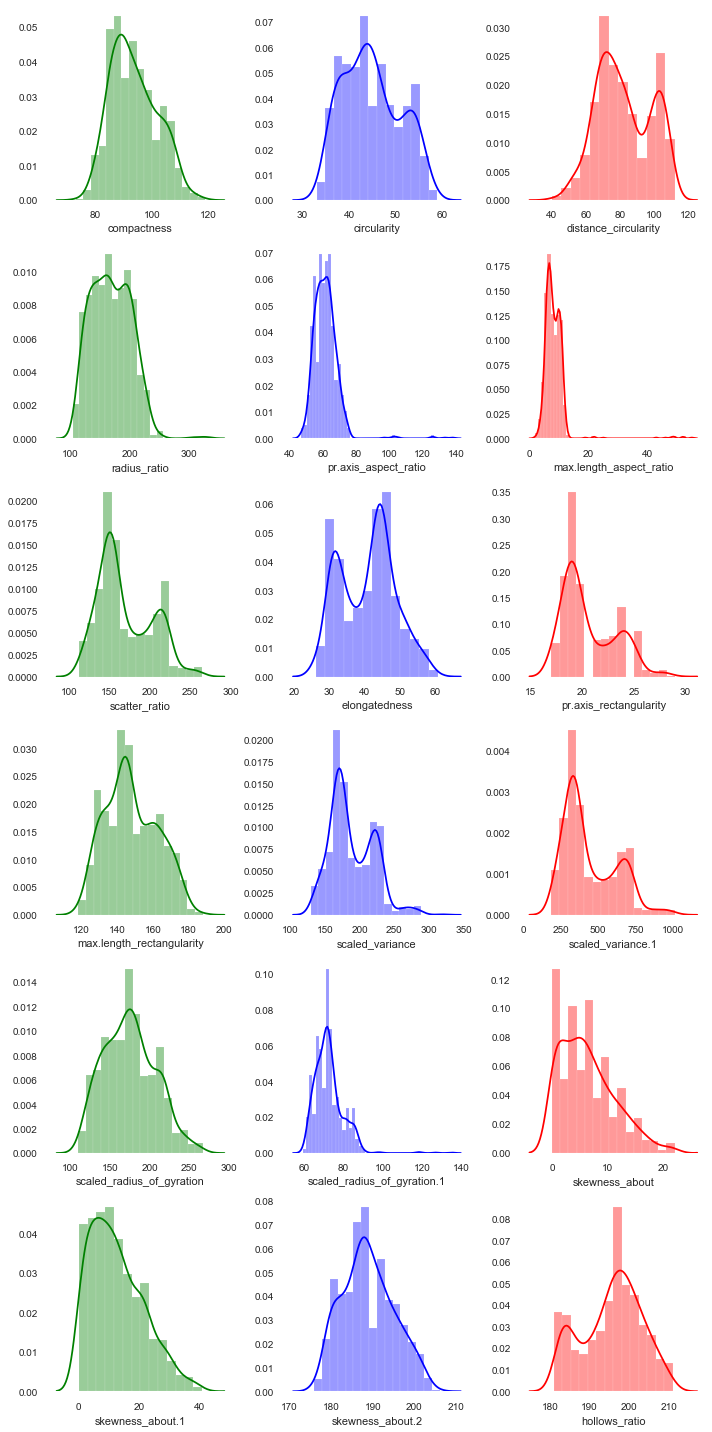

In [13]:
columns=['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio']
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(10,20))
colors = {0:'g', 1:'b', 2:'r'}
for i, column in enumerate(columns):
    sns.distplot(df[column],ax=axes[i//3,i%3],color=colors[i%3])
    plt.tight_layout() 

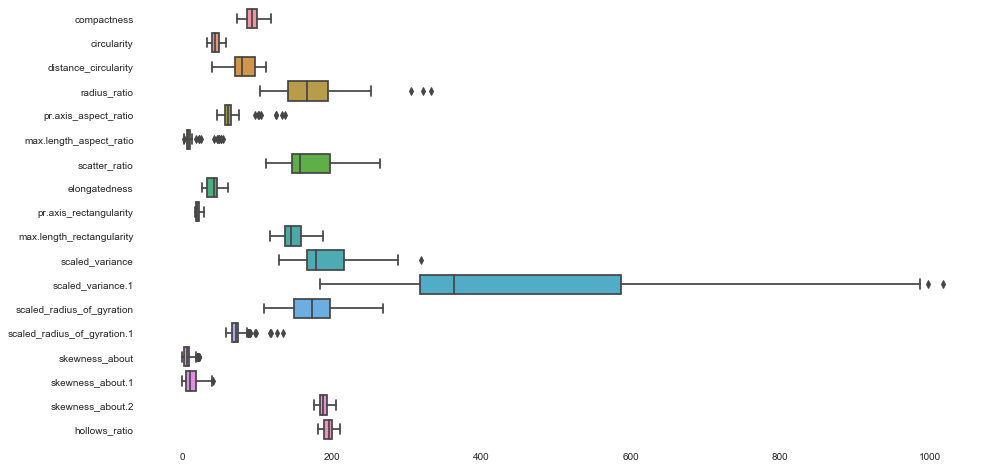

In [14]:
#BoxPlot to show outliers
fig = plt.figure(figsize = (15, 8))
ax = sns.boxplot(data = df.iloc[:, 0:18], orient = 'h')

In [15]:
# `radius_ratio`, `pr.axis_aspect_ratio`, `max.length_aspect_ratio`, `scaled_variance`,
# `scaled_variance.1`, `scaled_radius_of_gyration.1`, `skewness_about`, `skewness_about.1` columns has outliers. 

In [16]:
##Calculating the quantiles and iqr range
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
##Excluding the outliers
df = df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]
df.count()

compactness                    813
circularity                    813
distance_circularity           813
radius_ratio                   813
pr.axis_aspect_ratio           813
max.length_aspect_ratio        813
scatter_ratio                  813
elongatedness                  813
pr.axis_rectangularity         813
max.length_rectangularity      813
scaled_variance                813
scaled_variance.1              813
scaled_radius_of_gyration      813
scaled_radius_of_gyration.1    813
skewness_about                 813
skewness_about.1               813
skewness_about.2               813
hollows_ratio                  813
class                          813
dtype: int64

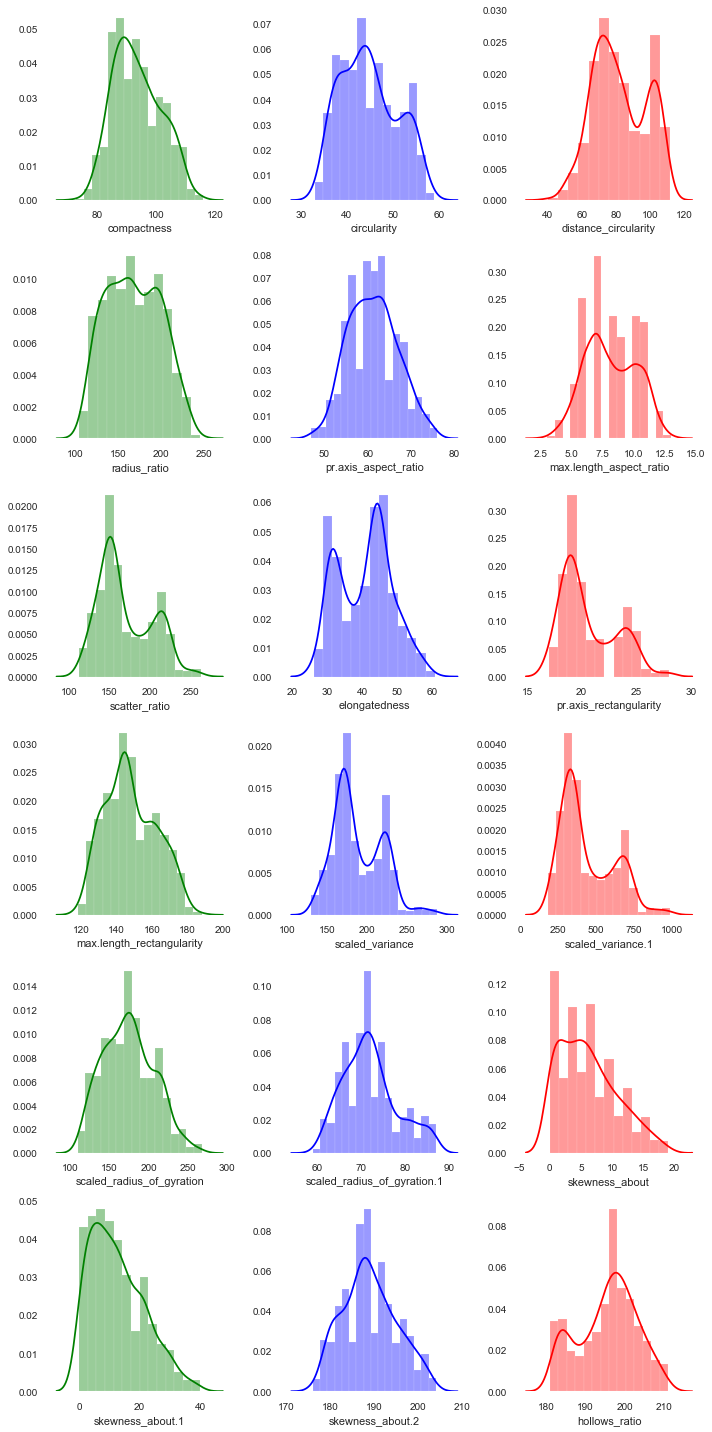

In [17]:
columns=['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio']
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(10,20))
colors = {0:'g', 1:'b', 2:'r'}
for i, column in enumerate(columns):
    sns.distplot(df[column],ax=axes[i//3,i%3],color=colors[i%3])
    plt.tight_layout() 

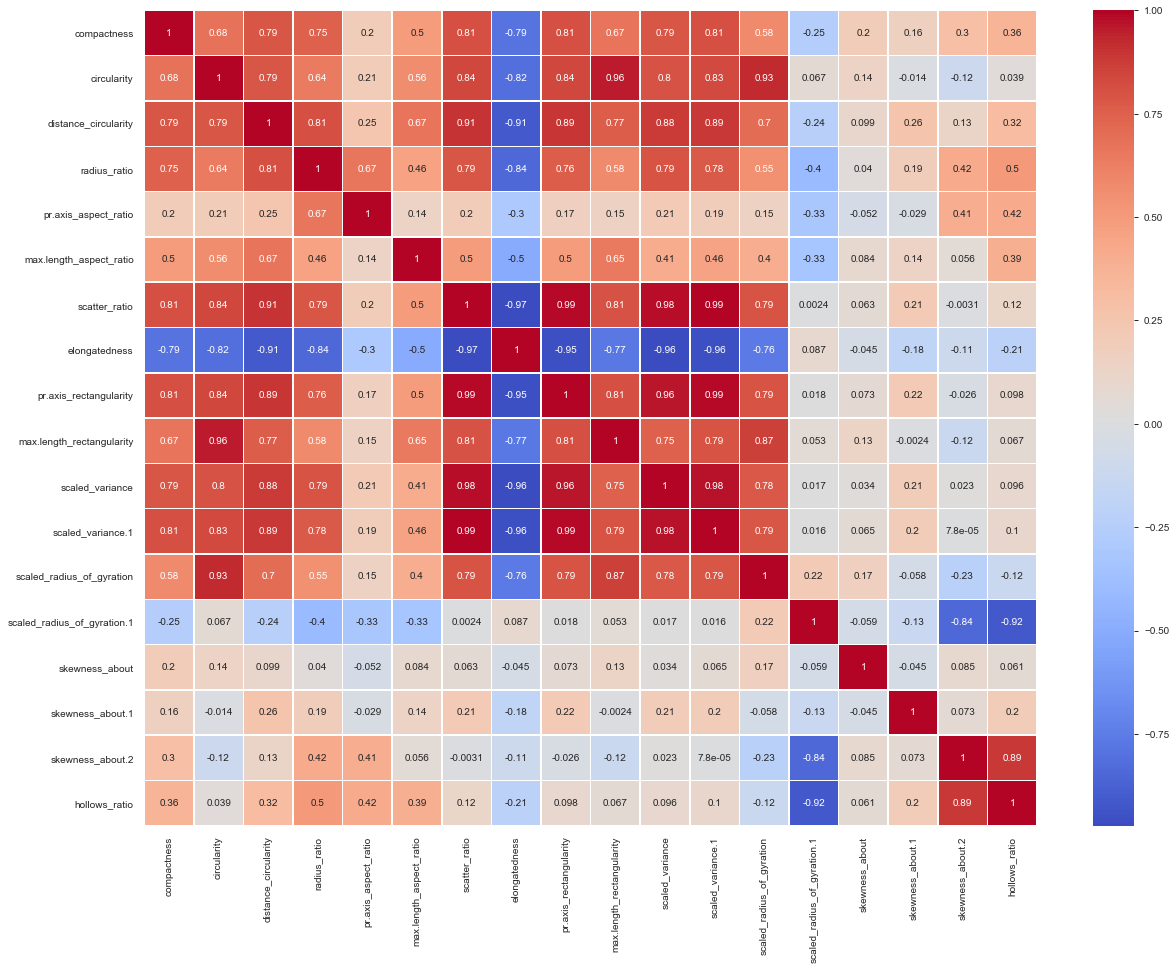

In [18]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True,linewidths=0.5,cmap='coolwarm')

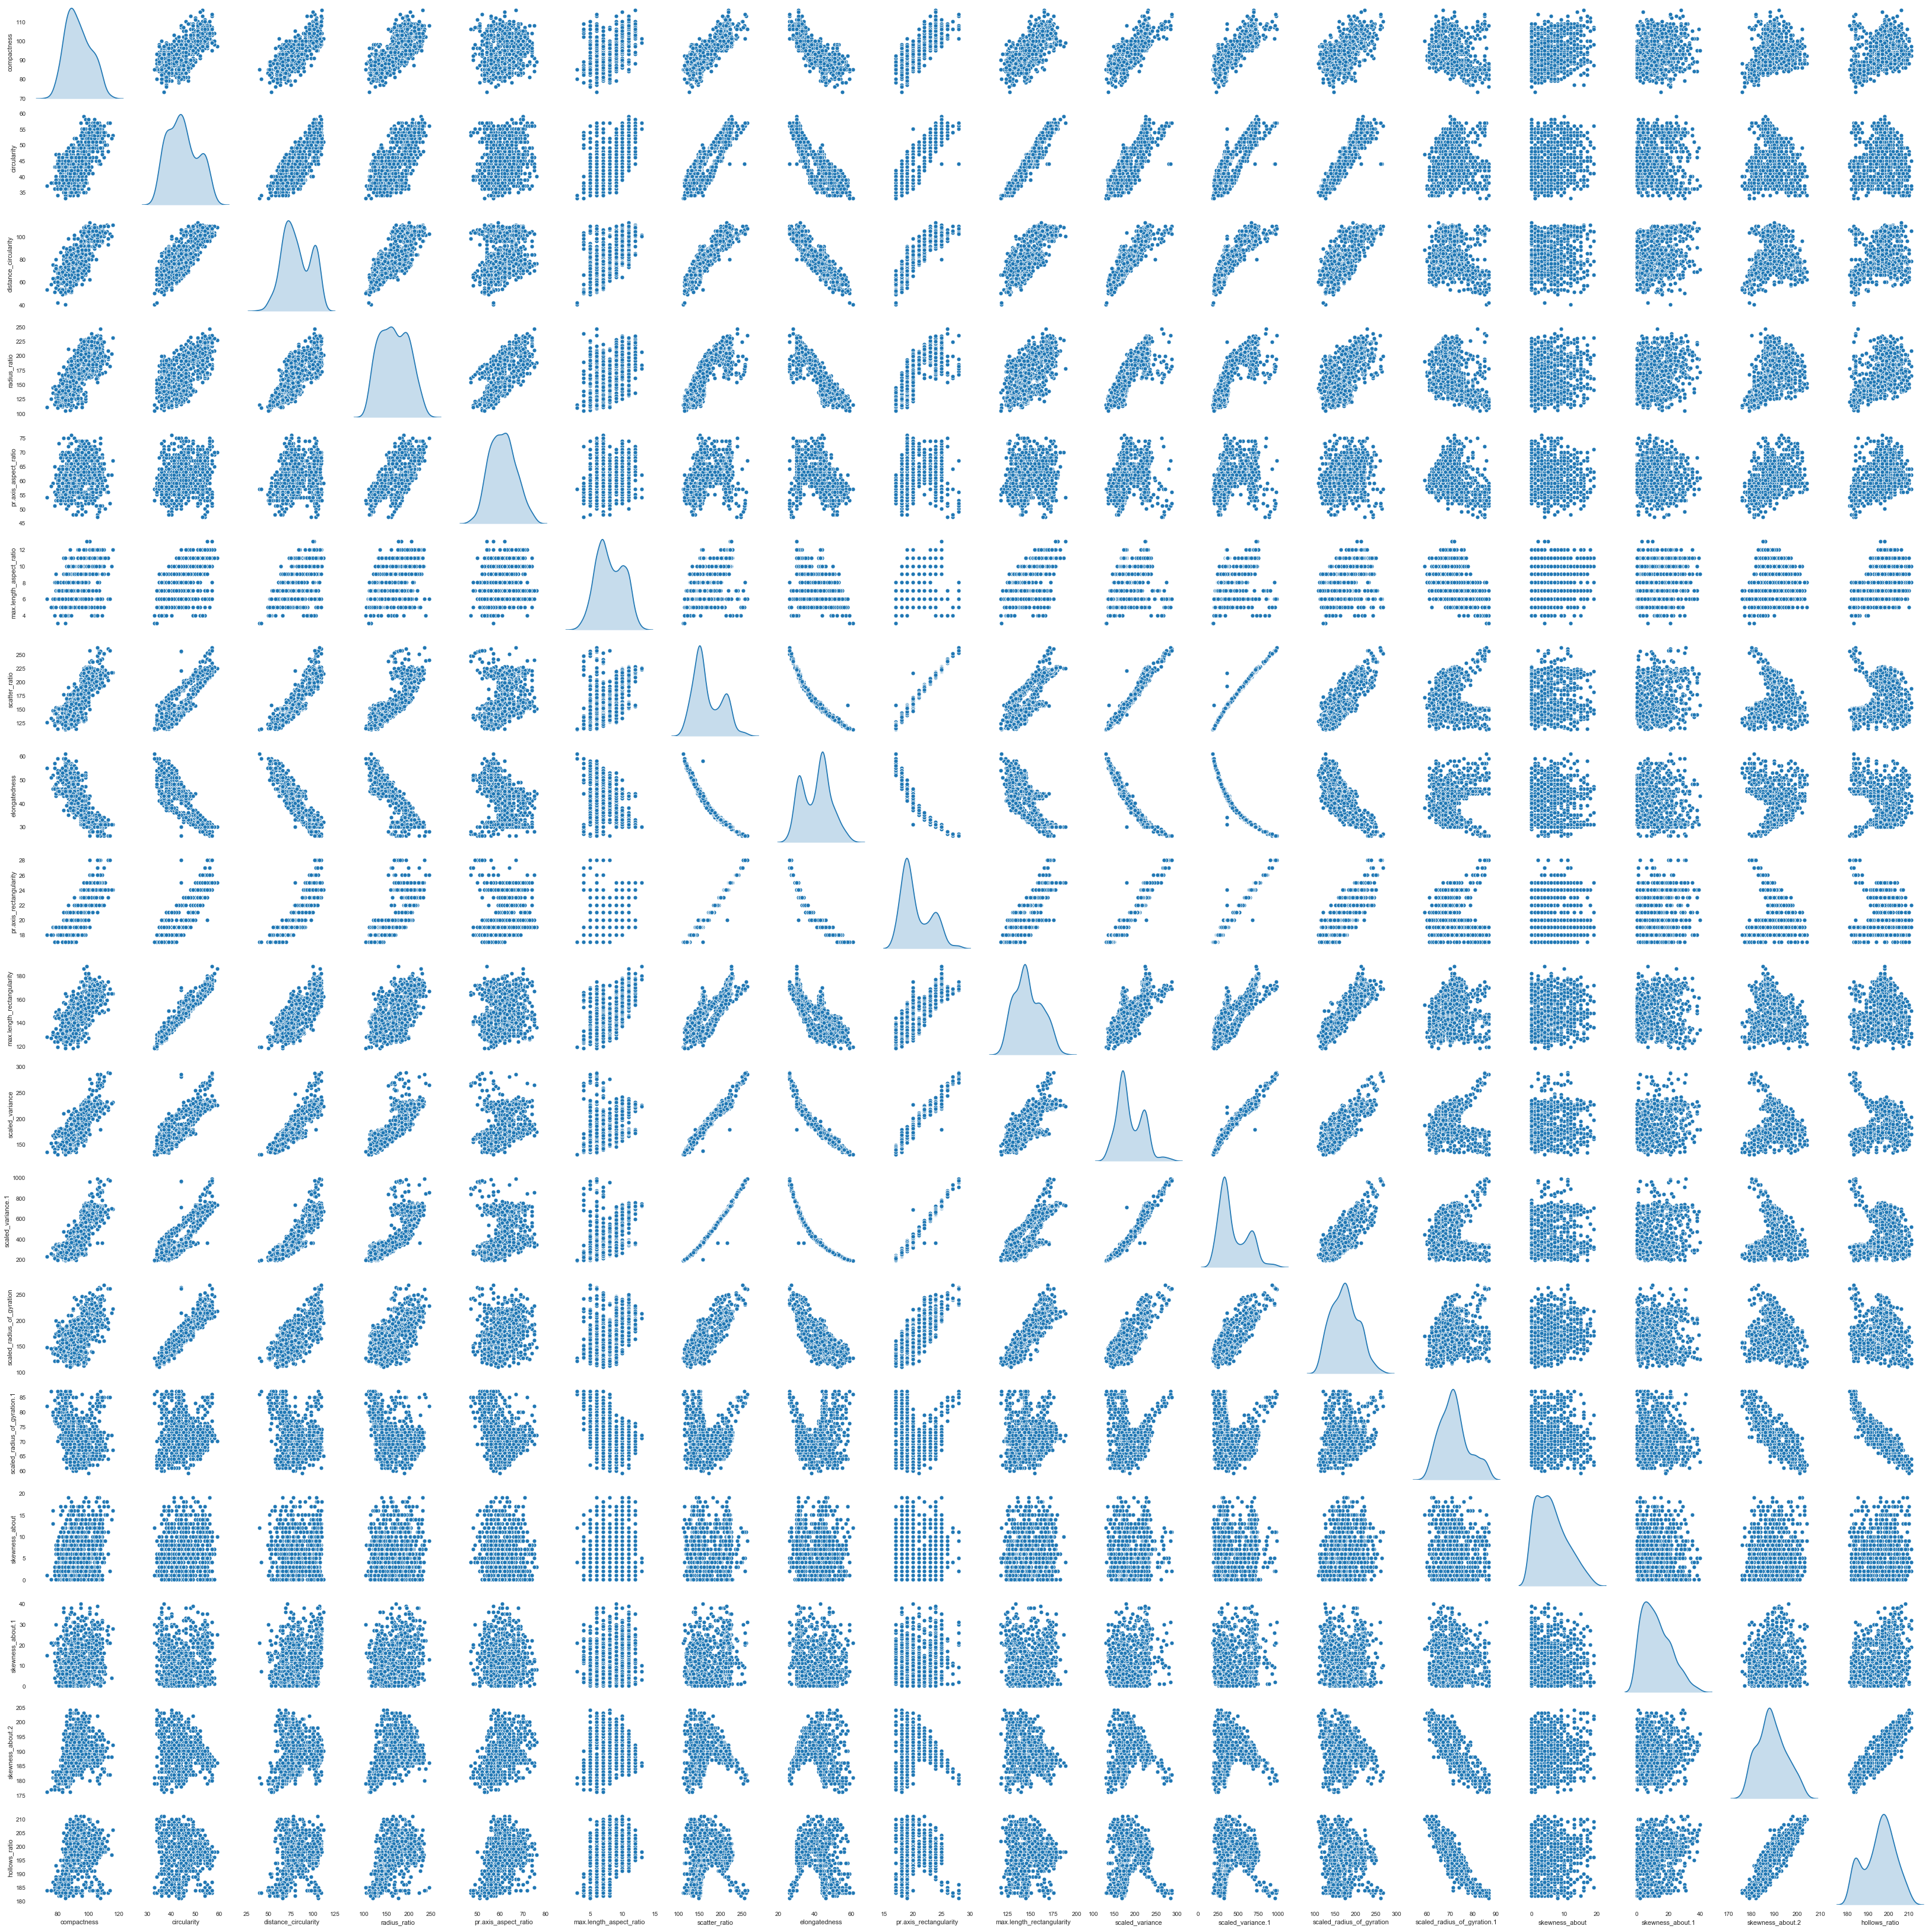

In [19]:
sns.pairplot(df,diag_kind='kde')

In [ ]:
# Most of the attributes show strong correlation(negatively or positively). Though multicollinearity exists between
# columns, We will let PCA do dimension reduction instead of removing the columns.

In [20]:
# Distribution of target variable
df['class'].value_counts()
df['class'].value_counts(normalize = True)*100

car    51.168512
bus    25.584256
van    23.247232
Name: class, dtype: float64

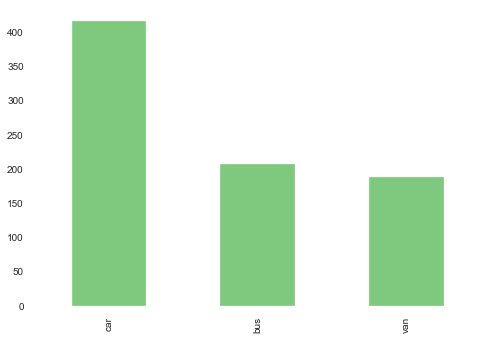

In [21]:
pd.value_counts(df["class"]).plot(kind="bar",colormap="Accent")

In [22]:
X = df.drop("class" , axis=1)
y = df.pop("class")

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print('Original number of features:', X.shape[1])

(569, 18)
(244, 18)
(569,)
(244,)
Original number of features: 18


In [24]:
# SVC without HyperParameter Tuning
model = SVC()

skf = StratifiedKFold(n_splits = 10)

model.fit(X_train, y_train)

## Cross Validation Score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X=X_train, y=y_train, cv = skf)
print("\nCross Validation Score:",round(scores.mean(), 2).astype(str))

#Prediction
y_pred=model.predict(X_test)

#evaluation(Accuracy)
print("Test Accuracy:", accuracy_score(y_test,y_pred).round(2))

# Classification Report
print('\n{}'.format(classification_report(y_test,y_pred)))

#evaluation(Confusion Metrix)
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))


Cross Validation Score: 0.62
Test Accuracy: 0.64

              precision    recall  f1-score   support

         bus       0.57      0.31      0.40        64
         car       0.75      0.73      0.74       124
         van       0.51      0.80      0.62        56

    accuracy                           0.64       244
   macro avg       0.61      0.62      0.59       244
weighted avg       0.65      0.64      0.63       244

Confusion Matrix:
 [[20 29 15]
 [ 5 91 28]
 [10  1 45]]


In [25]:
# SVC with HyperParameter Tuning

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = SVC()

#Hyper Parameters Set
params = {'C': [0.01,0.05,0.5,1], 'kernel': ['linear','rbf']}

skf = StratifiedKFold(n_splits = 10)
model = GridSearchCV(classifier, param_grid=params, n_jobs=10, cv = skf)
model.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model.best_params_)
print('\nTrain Accuracy: {0:.2f}'.format(model.score(X_train, y_train)))

## Cross Validation Score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X=X_train, y=y_train, cv = skf)
print("\nCross Validation Score:",round(scores.mean(), 2).astype(str))

#Prediction
y_pred=model.predict(X_test)

#evaluation(Accuracy)
print("Test Accuracy:", accuracy_score(y_test,y_pred).round(2))

# Classification Report
print('\n{}'.format(classification_report(y_test,y_pred)))

#evaluation(Confusion Metrix)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}

Train Accuracy: 0.98

Cross Validation Score: 0.96
Test Accuracy: 0.98

              precision    recall  f1-score   support

         bus       0.97      1.00      0.98        64
         car       0.99      0.97      0.98       124
         van       0.95      0.96      0.96        56

    accuracy                           0.98       244
   macro avg       0.97      0.98      0.97       244
weighted avg       0.98      0.98      0.98       244



### Principal Component Analysis

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Apply Principal Components that capture about 95% of the variance in the data
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print('Reduced number of features:', X_train.shape[1])

(569, 7)
(244, 7)
(569,)
(244,)
Reduced number of features: 7


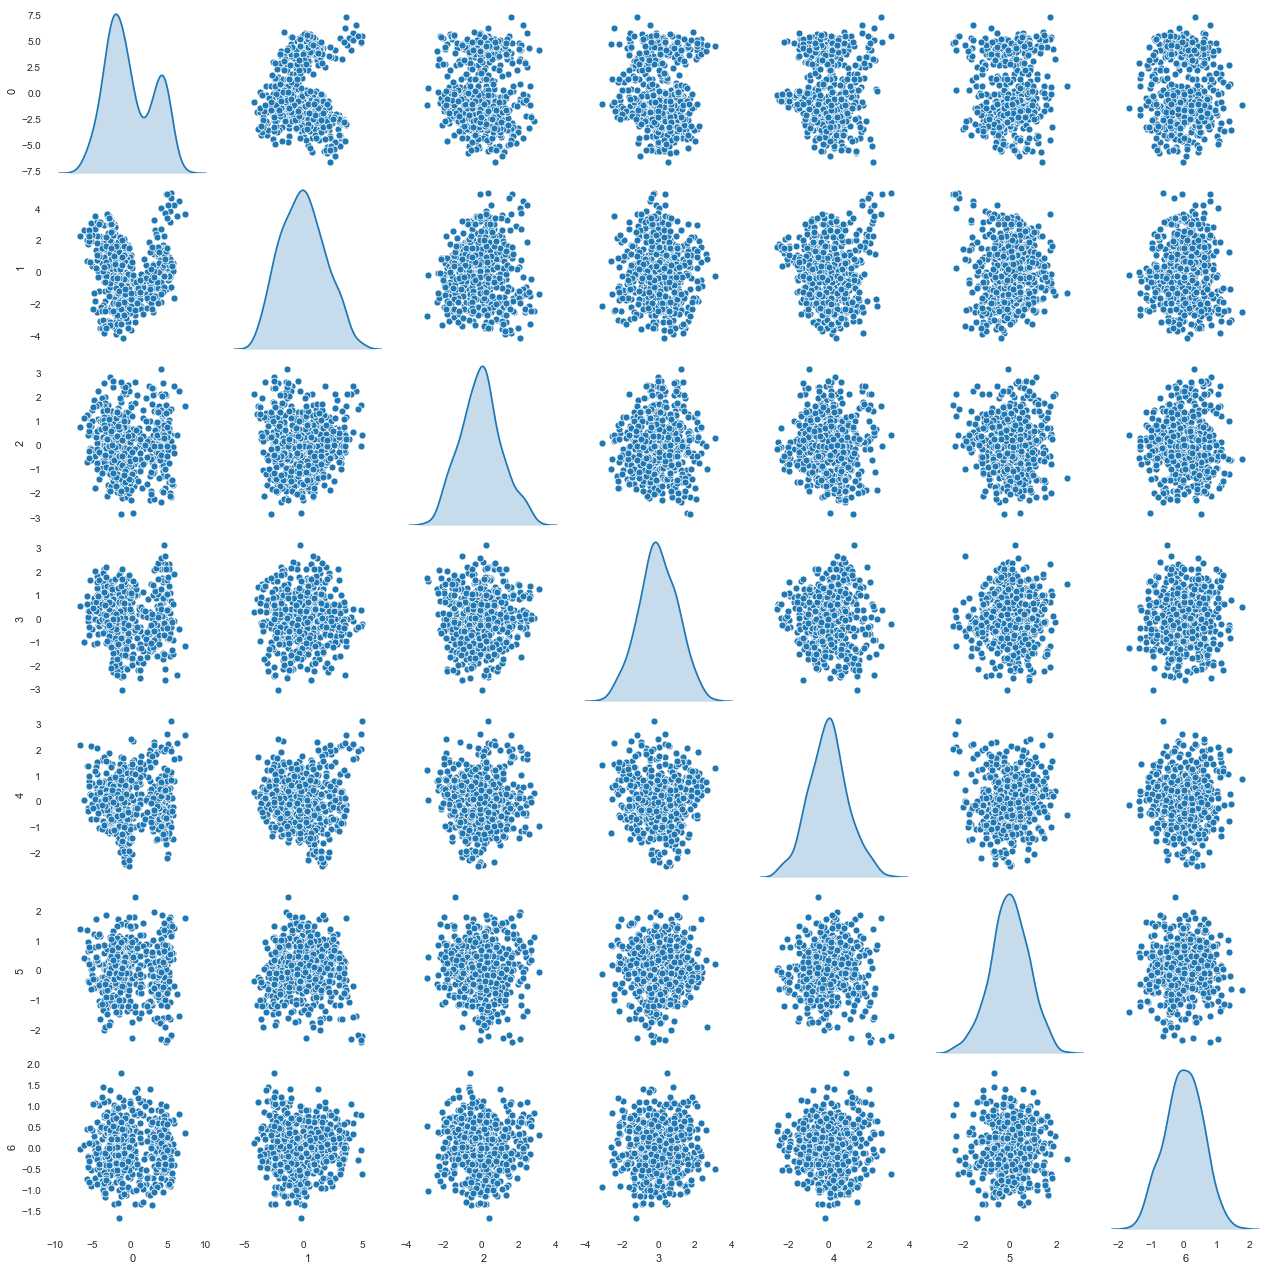

In [27]:
# Pairplot after dimension reduction
sns.pairplot(pd.DataFrame(X_train), diag_kind = 'kde')

In [28]:
print(pca.components_)

[[ 0.27555599  0.29097415  0.30087567  0.27462202  0.10412071  0.20434821
   0.30566569 -0.30932636  0.30147767  0.27966317  0.29921756  0.30478514
   0.2536198  -0.0503362   0.06161628  0.03516001  0.04155801  0.08126435]
 [-0.09933854  0.12461685 -0.03065343 -0.17419422 -0.22301768 -0.08596936
   0.08206156 -0.02099164  0.09009723  0.1063143   0.08059238  0.08544079
   0.18771202  0.51398622 -0.08728155 -0.08356094 -0.52175725 -0.50946305]
 [-0.09771289 -0.1532946  -0.03917303  0.27622417  0.48764565 -0.34415376
   0.08403957 -0.12598577  0.061732   -0.2295186   0.14589781  0.08488016
  -0.09953858  0.16761245 -0.52547825  0.32019257  0.01299017 -0.09023176]
 [ 0.02977024 -0.1751103   0.1680654  -0.13115074 -0.48465196  0.17468786
   0.08261026 -0.03350818  0.08398365 -0.13018988  0.07000295  0.06802211
  -0.2015921  -0.04579431 -0.01074903  0.75040255 -0.0904562   0.04454866]
 [ 0.15354689 -0.09631999 -0.06187577  0.07532846  0.02631467 -0.53736895
   0.05964744 -0.04251197  0.06209

In [29]:
print(pca.explained_variance_)

[10.26637674  3.49350519  1.25785175  1.20209294  0.84528838  0.60043313
  0.30860533]


In [30]:
print(pca.explained_variance_ratio_) 

[0.55191598 0.18780933 0.06762157 0.064624   0.04544234 0.03227903
 0.01659049]


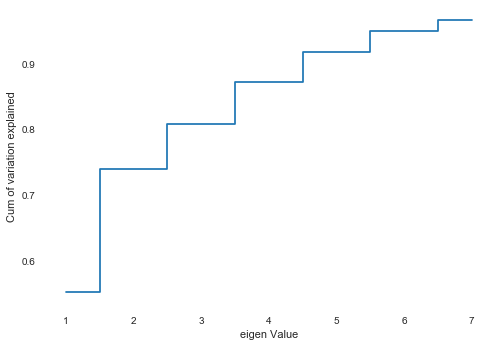

In [31]:
plt.step(list(range(1,8)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [32]:
#SVC using PCA

classifier = SVC()

#Hyper Parameters Set
params = {'C': [0.01,0.05,0.5,1], 'kernel': ['linear','rbf']}

skf = StratifiedKFold(n_splits = 10)
model = GridSearchCV(classifier, param_grid=params, n_jobs=10, cv = skf)
model.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model.best_params_)
print('\nTrain Accuracy:',model.score(X_train, y_train).round(2))

## Cross Validation Score
from sklearn.model_selection import cross_val_score
classifier = SVC(C=1, kernel="rbf")
scores = cross_val_score(classifier, X=X_train, y=y_train, cv = skf)
print("\nCross Validation Score:",scores.mean().round(2))

#Prediction
y_pred=model.predict(X_test)

#evaluation(Accuracy)
print("Test Accuracy:", accuracy_score(y_test,y_pred).round(2))

# Classification Report
print('\n{}'.format(classification_report(y_test,y_pred)))

#evaluation(Confusion Metrix)
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}

Train Accuracy: 0.95

Cross Validation Score: 0.92
Test Accuracy: 0.78

              precision    recall  f1-score   support

         bus       0.73      0.73      0.73        64
         car       0.83      0.80      0.81       124
         van       0.72      0.79      0.75        56

    accuracy                           0.78       244
   macro avg       0.76      0.77      0.77       244
weighted avg       0.78      0.78      0.78       244

Confusion Matrix:
 [[47 17  0]
 [ 8 99 17]
 [ 9  3 44]]


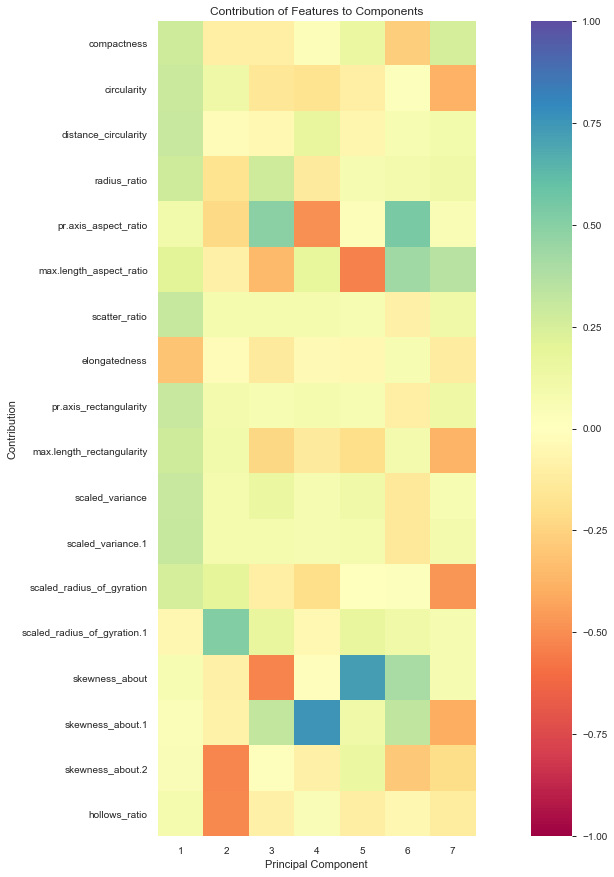

In [33]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.imshow(
    pca.components_.T,
    cmap="Spectral",
    vmin=-1,
    vmax=1,
)
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(7), range(1, 8))
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title(
    "Contribution of Features to Components"
)
plt.colorbar()

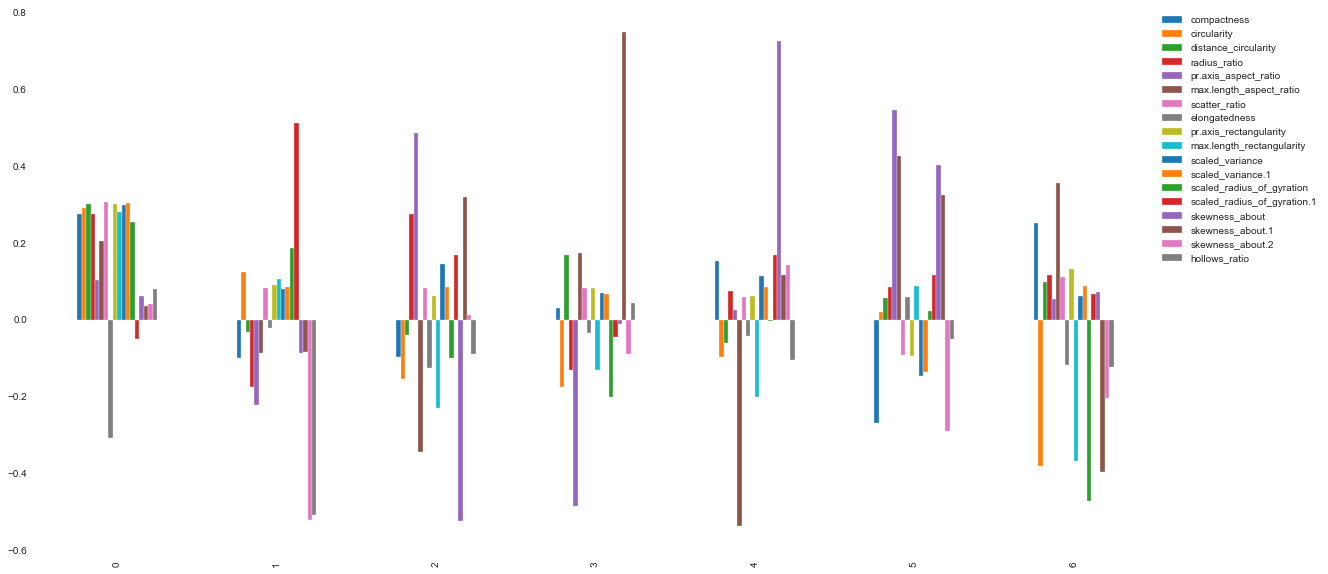

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))
pd.DataFrame(
    pca.components_, columns=df.columns
).plot(kind="bar", ax=ax).legend(
    bbox_to_anchor=(1, 1)
)

# Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings

Support vector machines – one trained using raw data

Without HyperParameter Tuning :
Cross Validation Score: 0.62
Accuracy: 0.64
    
**With HyperParameter Tuning:
Cross Validation Score: 0.96
Test Accuracy: 0.98 **

Support vector machines – one trained using Principal Components

Cross Validation Score: 0.92
Test Accuracy: 0.78
    
PCA being a statistical technique  reduce the dimensionality of the data by the selecting the most important features that captures maximum information about the dataset, does the task here. Here we have reduced the dimension from 18 to 7 and selected those which explained 95% variance.

Based on Accuracy scores, Cross validation scores and other parameters such as Recall, Precision, SVC with HyperParameter Tuning using raw data is much better than one using Principal Components.